In [1]:
import pandas as pd
df=pd.read_csv('2mtn_comments_analysis.csv')

In [2]:
df.columns

Index(['commentAuthor', 'commentLikesCount', 'commentText', 'commentTimestamp',
       'postCommentsCount', 'postDescription', 'postLikesCount',
       'postTimestamp', 'postUrl', 'profileDescription',
       'sentiment/finalClassification', 'sentiment/finalScore',
       'sentiment/negativeScore', 'sentiment/neutralScore',
       'sentiment/positiveScore', 'targetPlatform'],
      dtype='object')

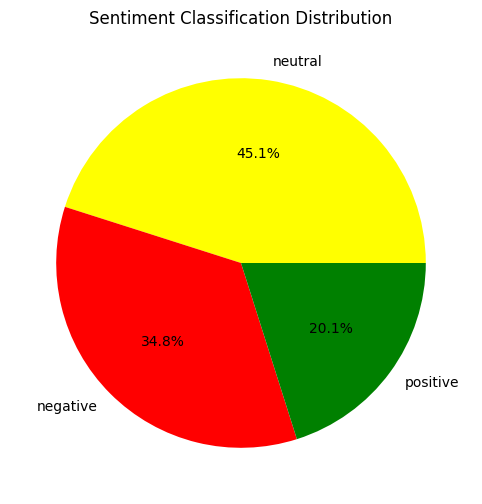

C:\Users\LCT\AppData\Local\Temp\ipykernel_15404\139572341.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')


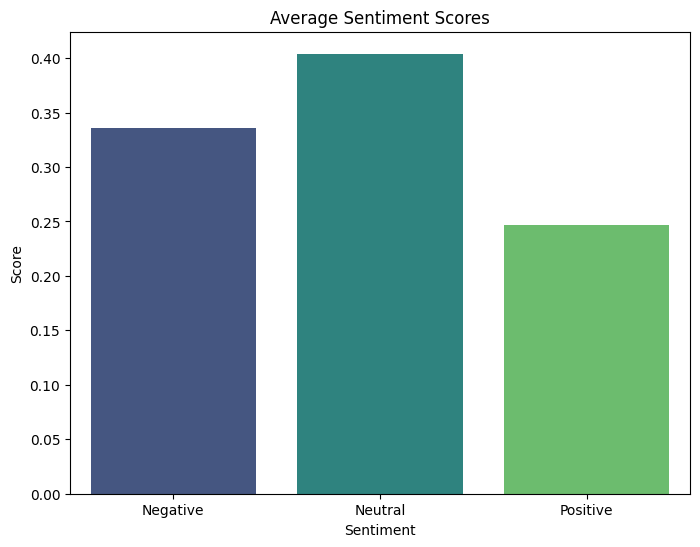

C:\Users\LCT\AppData\Local\Temp\ipykernel_15404\139572341.py:40: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

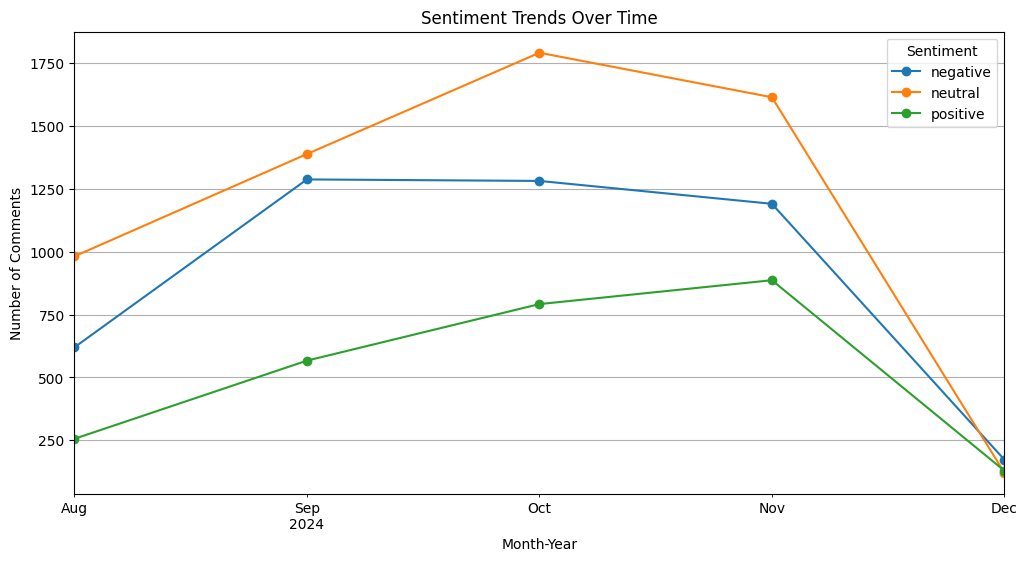

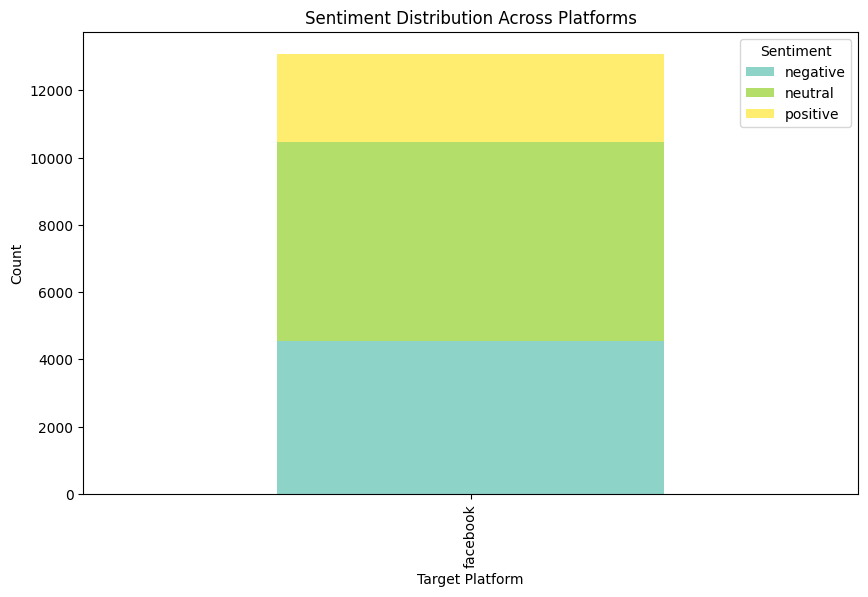

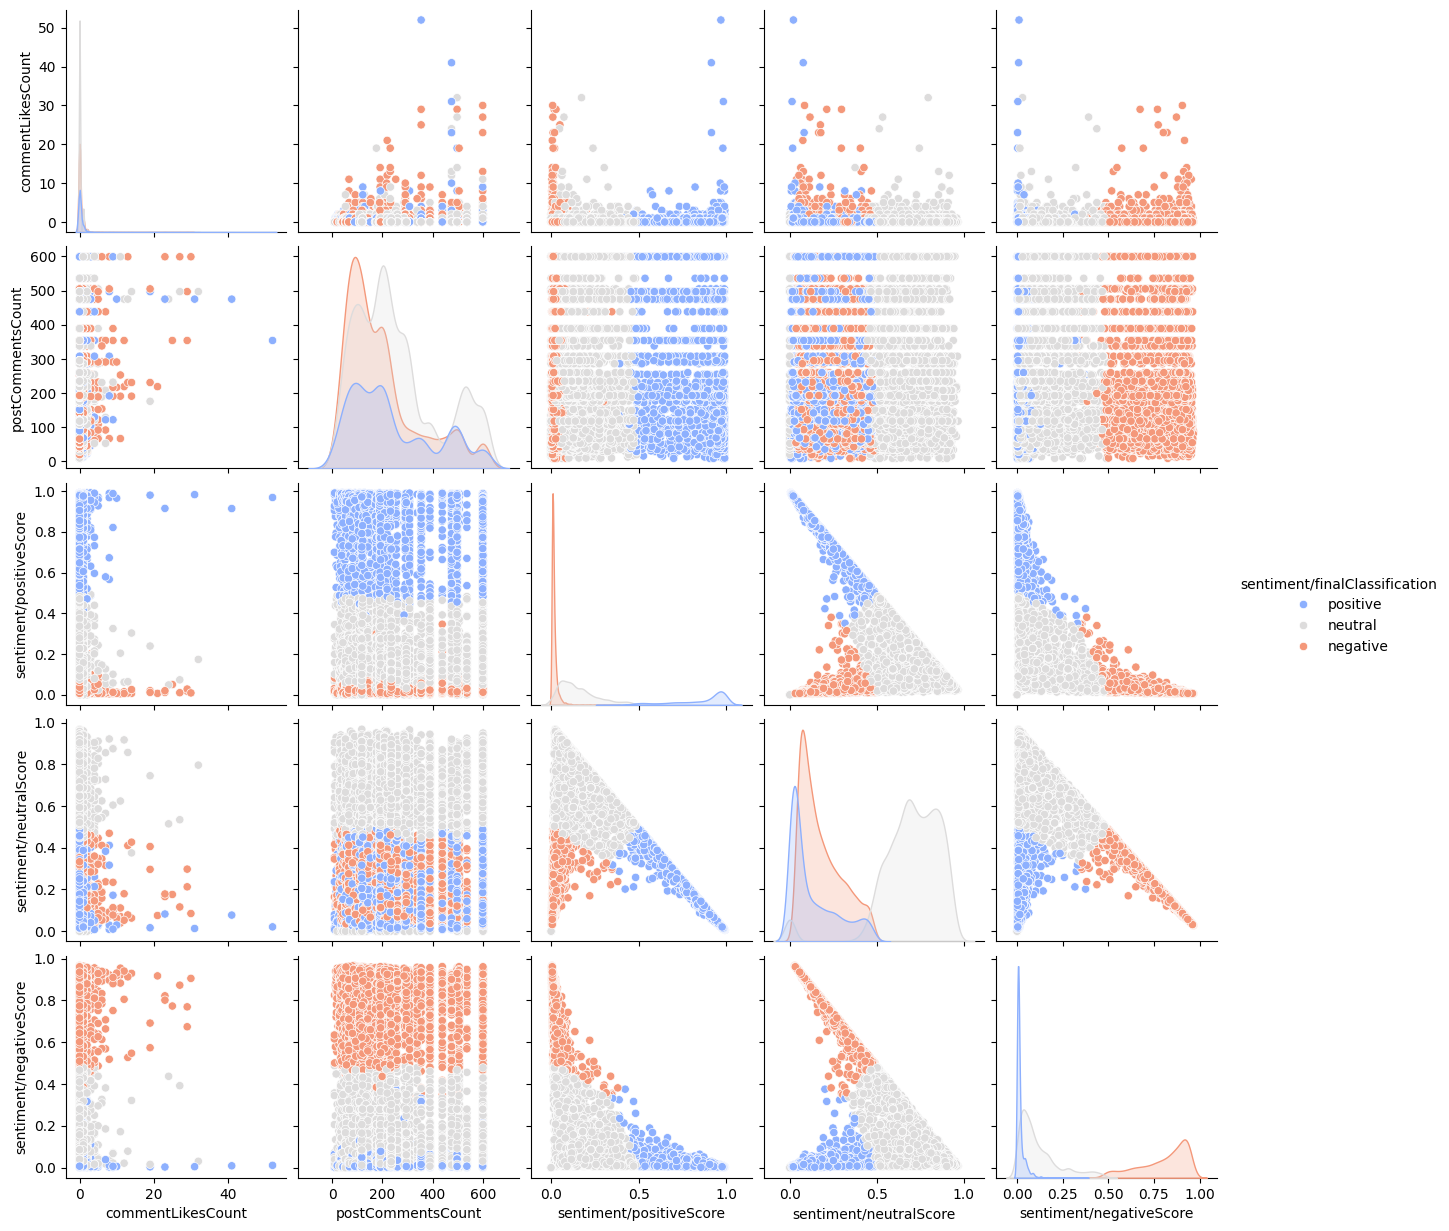

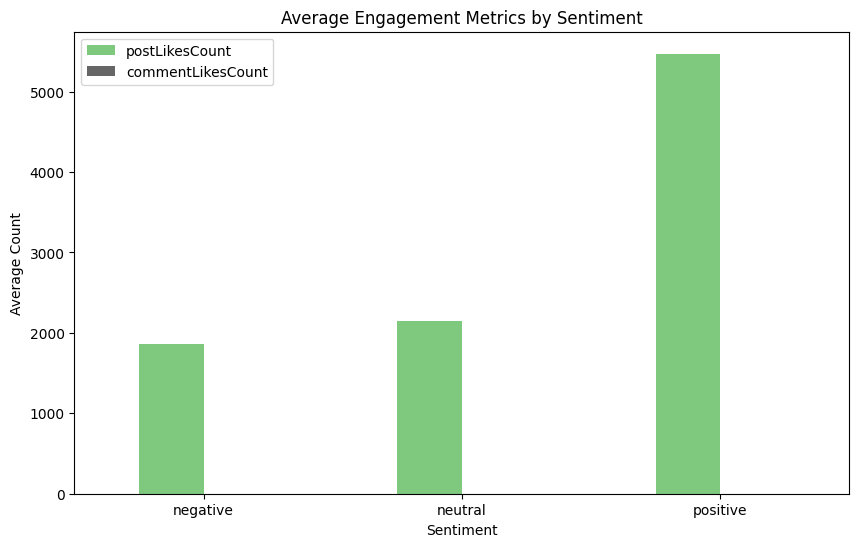

Sentiment Classification Counts:
 sentiment/finalClassification
neutral     5899
negative    4554
positive    2631
Name: count, dtype: int64

Average Sentiment Scores:
 {'Negative': np.float64(0.3354112718442991), 'Neutral': np.float64(0.4039657851652285), 'Positive': np.float64(0.24686568186586214)}

Engagement Metrics by Sentiment:
                                postLikesCount  commentLikesCount
sentiment/finalClassification                                   
negative                          1859.104304           0.354853
neutral                           2146.902695           0.186472
positive                          5471.502851           0.292664


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `df`
# df = pd.read_csv('your_data.csv')  # Uncomment to load from a file

# Convert timestamps to datetime for analysis
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])
df['postTimestamp'] = pd.to_datetime(df['postTimestamp'])

# ----- Sentiment Classification Distribution -----
sentiment_counts = df['sentiment/finalClassification'].value_counts()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['yellow','red', 'green'])
plt.title('Sentiment Classification Distribution')
plt.ylabel('')
plt.show()

# ----- Average Sentiment Scores -----
average_scores = {
    'Negative': df['sentiment/negativeScore'].mean(),
    'Neutral': df['sentiment/neutralScore'].mean(),
    'Positive': df['sentiment/positiveScore'].mean()
}
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Sentiment', 'Average Score'])

# Bar Chart for Average Sentiment Scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.xlabel('Sentiment')
plt.show()

# ----- Time-Based Sentiment Trends -----
# Extract month-year for grouping
df['month_year'] = df['commentTimestamp'].dt.to_period('M')
sentiment_trends = df.groupby(['month_year', 'sentiment/finalClassification']).size().unstack()

# Line Chart for Sentiment Trends Over Time
plt.figure(figsize=(10, 6))
sentiment_trends.plot(marker='o', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month-Year')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

# ----- Platform-Based Sentiment Distribution -----
platform_sentiment = df.groupby(['targetPlatform', 'sentiment/finalClassification']).size().unstack()

# Stacked Bar Chart for Sentiment by Platform
platform_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Sentiment Distribution Across Platforms')
plt.ylabel('Count')
plt.xlabel('Target Platform')
plt.legend(title='Sentiment')
plt.show()

# ----- Correlation Analysis -----
# Pairplot to visualize relationships between scores and engagement
sns.pairplot(df, vars=['commentLikesCount', 'postCommentsCount', 
                       'sentiment/positiveScore', 'sentiment/neutralScore', 'sentiment/negativeScore'],
             hue='sentiment/finalClassification', palette='coolwarm')
plt.show()

# ----- Profile Engagement by Sentiment -----
engagement_by_sentiment = df.groupby('sentiment/finalClassification')[['postLikesCount', 'commentLikesCount']].mean()

# Bar Chart for Profile Engagement by Sentiment
engagement_by_sentiment.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Average Engagement Metrics by Sentiment')
plt.ylabel('Average Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

# ----- Summary Statistics -----
print("Sentiment Classification Counts:\n", sentiment_counts)
print("\nAverage Sentiment Scores:\n", average_scores)
print("\nEngagement Metrics by Sentiment:\n", engagement_by_sentiment)


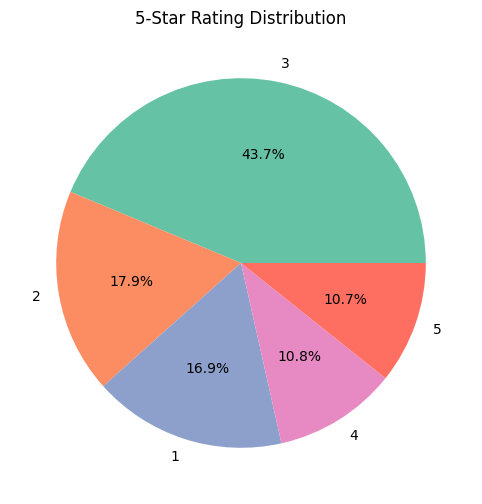

C:\Users\LCT\AppData\Local\Temp\ipykernel_15404\383449949.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')


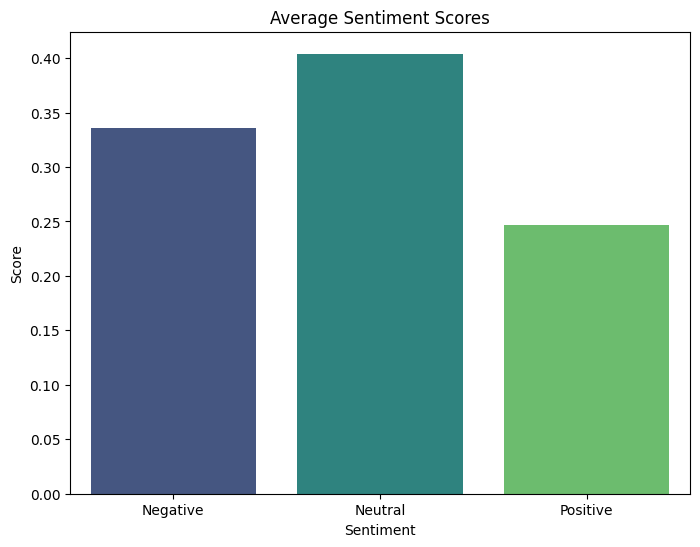

C:\Users\LCT\AppData\Local\Temp\ipykernel_15404\383449949.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

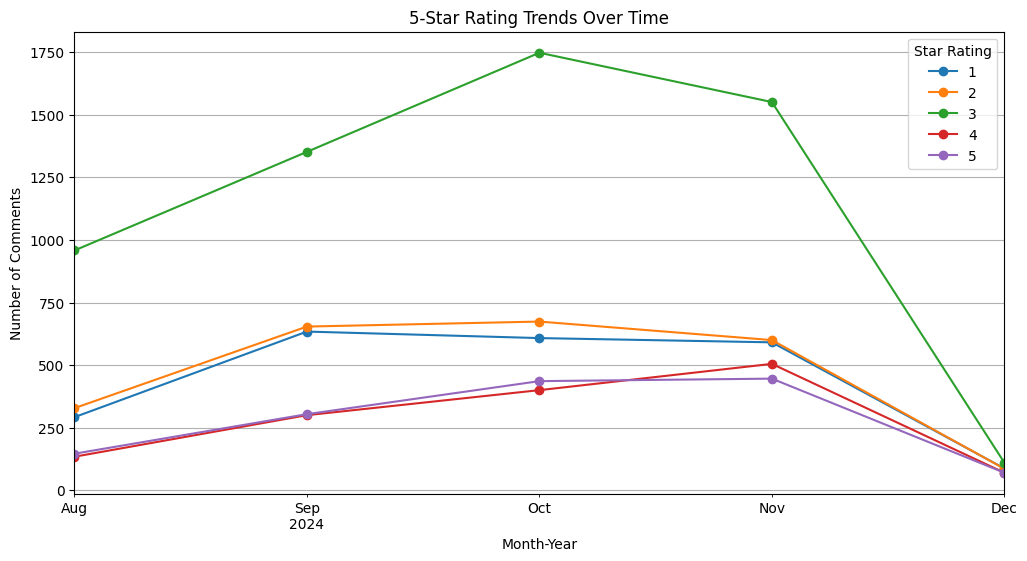

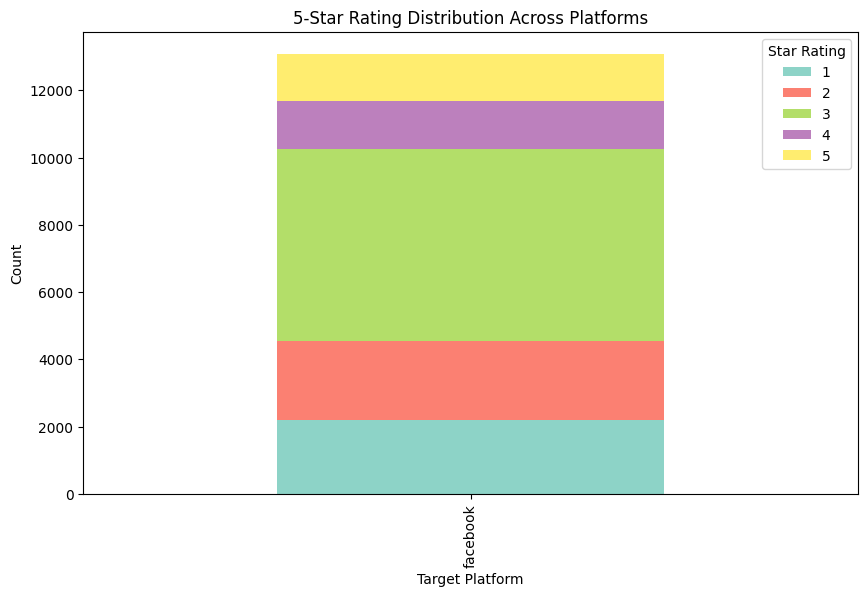

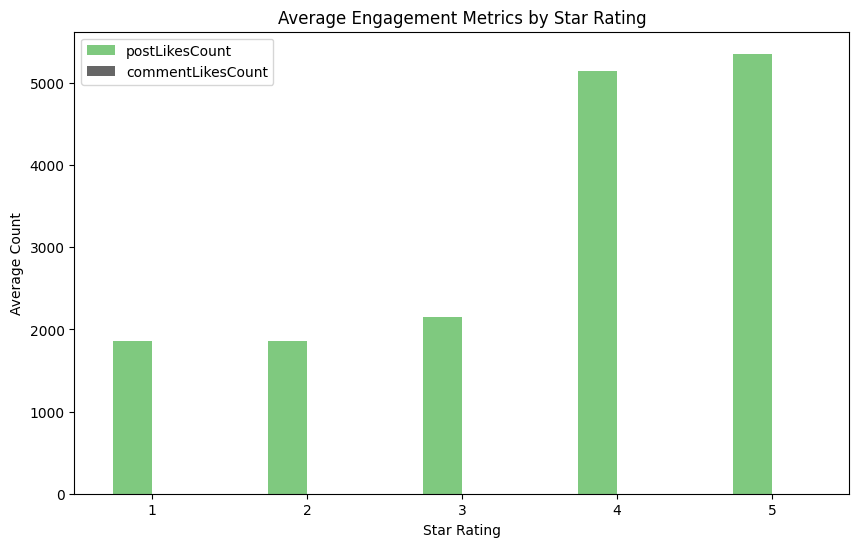

5-Star Rating Counts:
 starRating
3    5719
2    2342
1    2212
4    1409
5    1402
Name: count, dtype: int64

Average Sentiment Scores:
 {'Negative': np.float64(0.3354112718442991), 'Neutral': np.float64(0.4039657851652285), 'Positive': np.float64(0.24686568186586214)}

Engagement Metrics by Star Rating:
             postLikesCount  commentLikesCount
starRating                                   
1              1857.354882           0.346293
2              1860.756618           0.362938
3              2151.172408           0.188669
4              5143.940383           0.232789
5              5356.445078           0.330243


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the DataFrame is already loaded as `df`
# df = pd.read_csv('your_data.csv')  # Uncomment to load from a file

# Convert timestamps to datetime for analysis
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])
df['postTimestamp'] = pd.to_datetime(df['postTimestamp'])

# Function to map sentiment score to 5-star rating
def sentiment_to_stars(row):
    # Logic to assign stars based on sentiment scores
    if row['sentiment/negativeScore'] > max(row['sentiment/neutralScore'], row['sentiment/positiveScore']):
        return np.random.randint(1, 3)  # Negative: 1-2 stars
    elif row['sentiment/neutralScore'] >= row['sentiment/positiveScore'] and row['sentiment/neutralScore'] > row['sentiment/negativeScore']:
        return 3  # Neutral: 3 stars
    else:
        return np.random.randint(4, 6)  # Positive: 4-5 stars

# Apply the sentiment to stars conversion
df['starRating'] = df.apply(sentiment_to_stars, axis=1)

# ----- Sentiment Classification Distribution (5-Star) -----
star_counts = df['starRating'].value_counts()

# Pie Chart for 5-Star Sentiment Distribution
plt.figure(figsize=(8, 6))
star_counts.plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#ff6f61'])
plt.title('5-Star Rating Distribution')
plt.ylabel('')
plt.show()

# ----- Average Sentiment Scores -----
average_scores = {
    'Negative': df['sentiment/negativeScore'].mean(),
    'Neutral': df['sentiment/neutralScore'].mean(),
    'Positive': df['sentiment/positiveScore'].mean()
}
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Sentiment', 'Average Score'])

# Bar Chart for Average Sentiment Scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.xlabel('Sentiment')
plt.show()

# ----- Time-Based Sentiment Trends (5-Star) -----
# Extract month-year for grouping
df['month_year'] = df['commentTimestamp'].dt.to_period('M')
star_trends = df.groupby(['month_year', 'starRating']).size().unstack()

# Line Chart for 5-Star Sentiment Trends Over Time
plt.figure(figsize=(10, 6))
star_trends.plot(marker='o', figsize=(12, 6))
plt.title('5-Star Rating Trends Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month-Year')
plt.legend(title='Star Rating')
plt.grid()
plt.show()

# ----- Platform-Based 5-Star Sentiment Distribution -----
platform_star_rating = df.groupby(['targetPlatform', 'starRating']).size().unstack()

# Stacked Bar Chart for 5-Star Sentiment by Platform
platform_star_rating.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('5-Star Rating Distribution Across Platforms')
plt.ylabel('Count')
plt.xlabel('Target Platform')
plt.legend(title='Star Rating')
plt.show()

# ----- Profile Engagement by Sentiment -----
engagement_by_star = df.groupby('starRating')[['postLikesCount', 'commentLikesCount']].mean()

# Bar Chart for Profile Engagement by Star Rating
engagement_by_star.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Average Engagement Metrics by Star Rating')
plt.ylabel('Average Count')
plt.xlabel('Star Rating')
plt.xticks(rotation=0)
plt.show()

# ----- Summary Statistics -----
print("5-Star Rating Counts:\n", star_counts)
print("\nAverage Sentiment Scores:\n", average_scores)
print("\nEngagement Metrics by Star Rating:\n", engagement_by_star)


In [9]:

# Ensure 'sentiment/negativeScore' column is numeric
df['sentiment/negativeScore'] = pd.to_numeric(df['sentiment/negativeScore'], errors='coerce')

# Group by 'postUrl' and calculate the total negative score for each post
negative_scores_by_post = df.groupby('postUrl')['sentiment/negativeScore'].sum()

# Find the postUrl with the highest total negative score
most_negative_post_url = negative_scores_by_post.idxmax()
highest_negative_score = negative_scores_by_post.max()

# Filter the rows corresponding to the most negative post
most_negative_post_comments = df[df['postUrl'] == most_negative_post_url]

# Extract the post description (assuming it's the same for all rows of the same postUrl)
post_description = most_negative_post_comments['postDescription'].iloc[0]

# Display the results
print("Post with the highest negative sentiment (aggregated by comments):")
print(f"Post URL: {most_negative_post_url}")
print(f"Post Description: {post_description}")
print(f"Total Negative Score: {highest_negative_score}")
print("\nDetails of all comments for this post:")
print(most_negative_post_comments)


Post with the highest negative sentiment (aggregated by comments):
Post URL: https://www.facebook.com/MTNLoaded/posts/pfbid02JNpoSJQwYjWHVtBNX37T1BC5F1JUioRTNT6ZsQ4rCCRdZXEYVeRwUx9E4SGvWjudl
Post Description: Juggling motherhood and career? You're not alone!

Reclaim your career by applying for the MTN Yello Mums internship program today!

Application closes on November 19, 2024.

Available in Lagos only

Click here 👉 https://yellomums.mtn.ng/ to apply

#MTNYelloMums
Total Negative Score: 126.09471935336478

Details of all comments for this post:
                  commentAuthor  commentLikesCount  \
315             Obasuyi Godgift                  0   
316      Erengwa Blessing Linda                  0   
317                Kelvis Bekeh                  0   
318             Ayodele Ifedayo                  0   
319      Mubarak Umar Dogondaji                  1   
...                         ...                ...   
12192                Edeh Mãñdy                  0   
12193          

In [13]:

# Ensure 'sentiment/negativeScore' column is numeric
df['sentiment/negativeScore'] = pd.to_numeric(df['sentiment/negativeScore'], errors='coerce')

# Group by 'postUrl' and calculate the total negative score for each post
negative_scores_by_post = df.groupby('postUrl')['sentiment/negativeScore'].sum()

# Sort the posts by total negative score in descending order and get the top 3
top_3_negative_posts = negative_scores_by_post.sort_values(ascending=False).head(3)

# Display the top 3 posts and their total negative scores
print("Top 3 posts with the highest negative sentiment (aggregated by comments):")
for i, (post_url, negative_score) in enumerate(top_3_negative_posts.items(), start=1):
    # Filter the rows corresponding to the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Extract the post description (assuming it's the same for all rows of the same postUrl)
    post_description = post_comments['postDescription'].iloc[0]
    
    print(f"\nRank {i}:")
    print(f"Post URL: {post_url}")
    print(f"Post Description: {post_description}")
    print(f"Total Negative Score: {negative_score}")
    print("\nDetails of all comments for this post:")
    print(post_comments)


Top 3 posts with the highest negative sentiment (aggregated by comments):

Rank 1:
Post URL: https://www.facebook.com/MTNLoaded/posts/pfbid02JNpoSJQwYjWHVtBNX37T1BC5F1JUioRTNT6ZsQ4rCCRdZXEYVeRwUx9E4SGvWjudl
Post Description: Juggling motherhood and career? You're not alone!

Reclaim your career by applying for the MTN Yello Mums internship program today!

Application closes on November 19, 2024.

Available in Lagos only

Click here 👉 https://yellomums.mtn.ng/ to apply

#MTNYelloMums
Total Negative Score: 126.09471935336478

Details of all comments for this post:
                  commentAuthor  commentLikesCount  \
315             Obasuyi Godgift                  0   
316      Erengwa Blessing Linda                  0   
317                Kelvis Bekeh                  0   
318             Ayodele Ifedayo                  0   
319      Mubarak Umar Dogondaji                  1   
...                         ...                ...   
12192                Edeh Mãñdy                  0   

In [16]:
import pandas as pd

# Ensure 'sentiment/negativeScore' is numeric
df['sentiment/negativeScore'] = pd.to_numeric(df['sentiment/negativeScore'], errors='coerce')

# Group by 'postUrl' and calculate the total negative score for each post
negative_scores_by_post = df.groupby('postUrl')['sentiment/negativeScore'].sum()

# Sort the posts by total negative score in descending order and get the top 3
top_3_negative_posts = negative_scores_by_post.sort_values(ascending=False).head(3)

# Prepare table structure
result_table = []

for post_url, negative_score in top_3_negative_posts.items():
    # Filter rows for the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Get post description
    post_description = post_comments['postDescription'].iloc[0]
    
    # Get the top 3 negative comments
    top_negative_comments = post_comments.sort_values(by='sentiment/negativeScore', ascending=False).head(3)
    
    # Add rows to result_table
    for _, row in top_negative_comments.iterrows():
        result_table.append({
            'postUrl': post_url,
            'postDescription': post_description,
            'sentiment/negativeScore': row['sentiment/negativeScore'],
            'commentText': row['commentText']
        })

# Convert result_table to DataFrame
result_df = pd.DataFrame(result_table)

# Display the final table
print(result_df)


                                             postUrl  \
0  https://www.facebook.com/MTNLoaded/posts/pfbid...   
1  https://www.facebook.com/MTNLoaded/posts/pfbid...   
2  https://www.facebook.com/MTNLoaded/posts/pfbid...   
3  https://www.facebook.com/MTNLoaded/posts/pfbid...   
4  https://www.facebook.com/MTNLoaded/posts/pfbid...   
5  https://www.facebook.com/MTNLoaded/posts/pfbid...   
6  https://www.facebook.com/MTNLoaded/posts/pfbid...   
7  https://www.facebook.com/MTNLoaded/posts/pfbid...   
8  https://www.facebook.com/MTNLoaded/posts/pfbid...   

                                     postDescription  sentiment/negativeScore  \
0  Juggling motherhood and career? You're not alo...                 0.961661   
1  Juggling motherhood and career? You're not alo...                 0.958605   
2  Juggling motherhood and career? You're not alo...                 0.956456   
3  A good time to say thank you to our beautiful ...                 0.962368   
4  A good time to say thank you to

In [19]:
import pandas as pd

# Ensure 'sentiment/positiveScore' is numeric
df['sentiment/positiveScore'] = pd.to_numeric(df['sentiment/positiveScore'], errors='coerce')

# Group by 'postUrl' and calculate the total positive score for each post
positive_scores_by_post = df.groupby('postUrl')['sentiment/positiveScore'].sum()

# Sort the posts by total positive score in descending order and get the top 3
top_3_positive_posts = positive_scores_by_post.sort_values(ascending=False).head(3)

# Prepare table structure for result
result_table = []

for post_url, positive_score in top_3_positive_posts.items():
    # Filter rows for the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Get post description
    post_description = post_comments['postDescription'].iloc[0]
    
    # Get the top 3 positive comments (highest positive sentiment)
    top_positive_comments = post_comments.sort_values(by='sentiment/positiveScore', ascending=False).head(3)
    
    # Add rows to result_table
    for _, row in top_positive_comments.iterrows():
        result_table.append({
            'postUrl': post_url,
            'postDescription': post_description,
            'sentiment/positiveScore': row['sentiment/positiveScore'],
            'commentText': row['commentText']
        })

# Convert result_table to DataFrame
result_df = pd.DataFrame(result_table)

# Display the final table
print(result_df)


                                             postUrl  \
0  https://www.facebook.com/MTNLoaded/posts/pfbid...   
1  https://www.facebook.com/MTNLoaded/posts/pfbid...   
2  https://www.facebook.com/MTNLoaded/posts/pfbid...   
3  https://www.facebook.com/MTNLoaded/videos/5070...   
4  https://www.facebook.com/MTNLoaded/videos/5070...   
5  https://www.facebook.com/MTNLoaded/videos/5070...   
6  https://www.facebook.com/MTNLoaded/videos/1541...   
7  https://www.facebook.com/MTNLoaded/videos/1541...   
8  https://www.facebook.com/MTNLoaded/videos/1541...   

                                     postDescription  sentiment/positiveScore  \
0  Get ready, innovators!\n\nAn exciting opportun...                -0.002047   
1  Get ready, innovators!\n\nAn exciting opportun...                -0.011419   
2  Get ready, innovators!\n\nAn exciting opportun...                -0.014926   
3  Celebrated World Tourism Day with a bang!💥\n\n...                -0.002646   
4  Celebrated World Tourism Day wi

In [20]:
import pandas as pd

# Ensure 'sentiment/positiveScore' is numeric
df['sentiment/positiveScore'] = pd.to_numeric(df['sentiment/positiveScore'], errors='coerce')

# Group by 'postUrl' and calculate the total positive score for each post
positive_scores_by_post = df.groupby('postUrl')['sentiment/positiveScore'].sum()

# Sort the posts by total positive score in descending order and get the top 3
top_3_positive_posts = positive_scores_by_post.sort_values(ascending=False).head(3)

# Prepare table structure for result
result_table = []

for post_url, positive_score in top_3_positive_posts.items():
    # Filter rows for the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Get post description
    post_description = post_comments['postDescription'].iloc[0]
    
    # Get the top 3 positive comments (highest positive sentiment)
    top_positive_comments = post_comments.sort_values(by='sentiment/positiveScore', ascending=False).head(3)
    
    # Add rows to result_table
    for _, row in top_positive_comments.iterrows():
        result_table.append({
            'postUrl': post_url,
            'postDescription': post_description,
            'sentiment/positiveScore': row['sentiment/positiveScore'],
            'commentText': row['commentText']
        })

# Convert result_table to DataFrame
result_df = pd.DataFrame(result_table)

# Display the final table
print(result_df)


                                             postUrl  \
0  https://www.facebook.com/MTNLoaded/posts/pfbid...   
1  https://www.facebook.com/MTNLoaded/posts/pfbid...   
2  https://www.facebook.com/MTNLoaded/posts/pfbid...   
3  https://www.facebook.com/MTNLoaded/videos/5070...   
4  https://www.facebook.com/MTNLoaded/videos/5070...   
5  https://www.facebook.com/MTNLoaded/videos/5070...   
6  https://www.facebook.com/MTNLoaded/videos/1541...   
7  https://www.facebook.com/MTNLoaded/videos/1541...   
8  https://www.facebook.com/MTNLoaded/videos/1541...   

                                     postDescription  sentiment/positiveScore  \
0  Get ready, innovators!\n\nAn exciting opportun...                -0.002047   
1  Get ready, innovators!\n\nAn exciting opportun...                -0.011419   
2  Get ready, innovators!\n\nAn exciting opportun...                -0.014926   
3  Celebrated World Tourism Day with a bang!💥\n\n...                -0.002646   
4  Celebrated World Tourism Day wi